In [11]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load dataset
iris = load_iris()

# Create DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add target column
df['target'] = iris.target

# (Optional) Add target names
df['target_name'] = df['target'].apply(lambda x : iris.target_names[x])
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


In [ ]:
petal_features = df[["petal length (cm)", "petal width (cm)"]]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


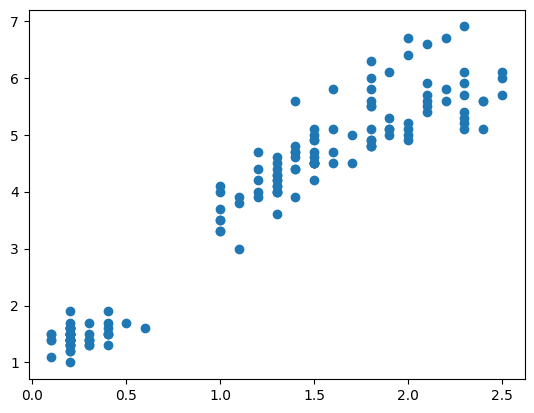

In [9]:
plt.scatter(petal_features["petal width (cm)"], petal_features["petal length (cm)"])
plt.show()

In [13]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(petal_features[["petal width (cm)"]], petal_features[["petal length (cm)"]])
    sse.append(km.inertia_)

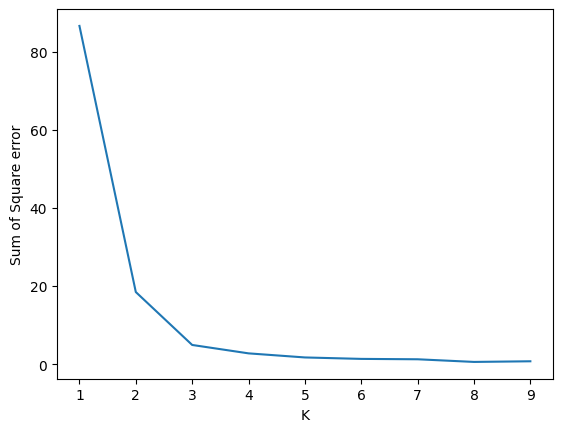

In [15]:
plt.xlabel("K")
plt.ylabel("Sum of Square error")
plt.plot(k_rng, sse)
plt.show()

In [ ]:
scaler = MinMaxScaler()
scaler.fit(petal_features[["petal width (cm)"]])
petal_features["s_petal_width"] = scaler.transform(petal_features[["petal width (cm)"]])

scaler.fit(petal_features[["petal length (cm)"]])
petal_features["s_petal_length"] = scaler.transform(petal_features[["petal length (cm)"]])



,petal length (cm),petal width (cm),s_petal_width,s_petal_length
0,1.4,0.2,0.041667,0.067797
1,1.4,0.2,0.041667,0.067797
2,1.3,0.2,0.041667,0.050847
3,1.5,0.2,0.041667,0.084746
4,1.4,0.2,0.041667,0.067797


In [ ]:
km = KMeans(n_clusters=3)

predicted = km.fit_predict(petal_features[["s_petal_width", "s_petal_length"]])
petal_features["cluster"] = predicted

petal_features.head()

,petal length (cm),petal width (cm),s_petal_width,s_petal_length,cluster
145,5.2,2.3,0.916667,0.711864,2
146,5.0,1.9,0.750000,0.677966,2
147,5.2,2.0,0.791667,0.711864,2
148,5.4,2.3,0.916667,0.745763,2
149,5.1,1.8,0.708333,0.694915,2


In [22]:
km.cluster_centers_

array([[0.51041667, 0.55867014],
       [0.06083333, 0.07830508],
       [0.81510417, 0.7740113 ]])

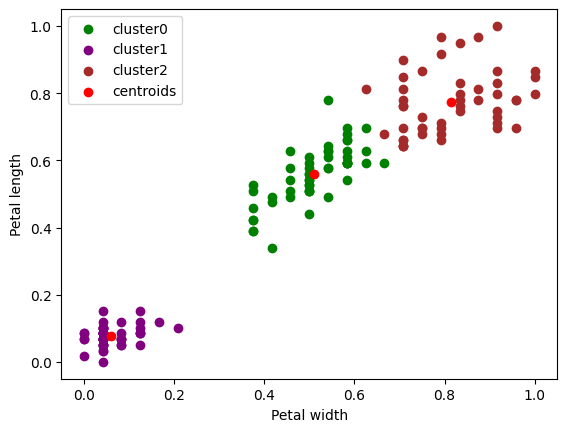

In [25]:
df0 = petal_features[petal_features.cluster == 0]
df1 = petal_features[petal_features.cluster == 1]
df2 = petal_features[petal_features.cluster == 2]

plt.scatter(df0["s_petal_width"], df0["s_petal_length"], label="cluster0", color="green")
plt.scatter(df1["s_petal_width"], df1["s_petal_length"], label="cluster1", color="purple")
plt.scatter(df2["s_petal_width"], df2["s_petal_length"], label="cluster2", color="brown")
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], label="centroids", color="red")

plt.xlabel("Petal width")
plt.ylabel("Petal length")
plt.legend()
plt.show()
